In [2]:
##Imports 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from glob import glob
import cv2
import os
import random


In [3]:
#CONFIG STRING DATA
health_keyword = "class0"
disease_keyword = "class1"


In [4]:
##Description tree structure of images directory
def rootTree(rootDir): 
    list_dirs = os.walk(rootDir) 
    for root, dirs, files in list_dirs: 
        for i, d in zip(range(2), dirs): #ONLY RUNS TWO TIMES
            print(d)
        for j, f in zip(range(2), files):
            print(f)


In [5]:
rootTree("../breast_histopathology/input/")


breast-histopathology-images
IDC_regular_ps50_idx5
10253
10254
0
1
10253_idx5_x1001_y1001_class0.png
10253_idx5_x1001_y1051_class0.png
10253_idx5_x501_y351_class1.png
10253_idx5_x501_y401_class1.png
0
1
10254_idx5_x1001_y1001_class0.png
10254_idx5_x1001_y1051_class0.png
10254_idx5_x1601_y1301_class1.png
10254_idx5_x1601_y1351_class1.png
0
1
10255_idx5_x1001_y1551_class0.png
10255_idx5_x1001_y1601_class0.png
10255_idx5_x1001_y501_class1.png
10255_idx5_x1001_y551_class1.png
0
1
10256_idx5_x1001_y1001_class0.png
10256_idx5_x1001_y1051_class0.png
10256_idx5_x1601_y1051_class1.png
10256_idx5_x1601_y1101_class1.png
0
1
10257_idx5_x1001_y1501_class0.png
10257_idx5_x1001_y1551_class0.png
10257_idx5_x1501_y1051_class1.png
10257_idx5_x1501_y1101_class1.png
0
1
10258_idx5_x1001_y101_class0.png
10258_idx5_x1001_y1151_class0.png
10258_idx5_x1001_y1001_class1.png
10258_idx5_x1001_y1051_class1.png
0
1
10259_idx5_x1001_y1001_class0.png
10259_idx5_x1001_y1451_class0.png
10259_idx5_x1201_y1801_class1.pn

In [6]:
#HOW MANY PATIENTS ARE IN DATASET'S --> ID FOLDERS LIKE 10253
numberPatients = os.listdir("../breast_histopathology/input/breast-histopathology-images/IDC_regular_ps50_idx5/")
print(len(numberPatients))


279


In [7]:
##GET ALL IMAGES
images = glob(pathname='../breast_histopathology/input/breast-histopathology-images/IDC_regular_ps50_idx5/**/*.png', recursive=True) #RELATIVE PATHNAME
#HOW MANY IMAGES ARE IN DATASET??
print(len(images))


277524


In [8]:
#HOW MANY SAMPLES ARE FROM CLASS 0 --> NO DISEASE
healthy_samples = [file_index for file_index, filename in enumerate(images) if health_keyword in filename]
print(len(healthy_samples))


198738


In [9]:
#HOW MANY SAMPLES ARE FROM CLASS 1 --> WITH DISEASE
disease_samples = [file_index for file_index, filename in enumerate(images) if disease_keyword in filename]
print(len(disease_samples))


78786


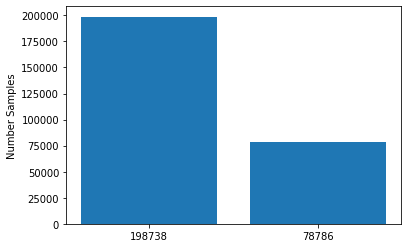

In [10]:
#HISTOGRAM THAT REPRESENTS DISTRIBUTION OF IMAGES PER CLASS
bar_names = ('Healthy Samples', 'Disease Samples')
y_pos = np.arange(len(bar_names))
samples_total = [len(healthy_samples), len(disease_samples)]
plt.bar(y_pos, samples_total, align='center')
plt.xticks(y_pos, samples_total)
plt.ylabel('Number Samples')
plt.show()


In [14]:
#CREATION OF DATAFRAME WITH ALL IMAGES --> [ID_PATIENT, PATH_IMAGE, TARGET]
data = pd.DataFrame(index=np.arange(0, len(images)), columns=["id", "image_path", "target"])

patients_dirs = os.listdir("../breast_histopathology/input/breast-histopathology-images/IDC_regular_ps50_idx5")
rootBase = "../breast_histopathology/input/breast-histopathology-images/IDC_regular_ps50_idx5"

#POPULATE DATAFRAME
add_row = 0
for i in range(len(numberPatients)):
    patient_dir = patients_dirs[i]
    patient_link = os.path.join(rootBase, patient_dir)
    for path in os.listdir(os.path.join(patient_link)):
        files = os.path.join(patient_link, path)
        for file in os.listdir(files):
            data.iloc[add_row]["id"] = patient_dir
            data.iloc[add_row]["target"] = path
            data.iloc[add_row]["image_path"] = os.path.join(files, file)
            add_row = add_row + 1
            

In [15]:
#FIRST FIVE LINES OF DATA FRAME
data.head(5)


,id,image_path,target
0,10253,../breast_histopathology/input/breast-histopat...,0
1,10253,../breast_histopathology/input/breast-histopat...,0
2,10253,../breast_histopathology/input/breast-histopat...,0
3,10253,../breast_histopathology/input/breast-histopat...,0
4,10253,../breast_histopathology/input/breast-histopat...,0


In [14]:
#CHECK SHAPE OF DATA
data.shape


(277524, 3)

In [16]:
#CHECK IF EXISTS NULL VALUES
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 277524 entries, 0 to 277523
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id          277524 non-null  object
 1   image_path  277524 non-null  object
 2   target      277524 non-null  object
dtypes: object(3)
memory usage: 8.5+ MB


In [17]:
#GET FIRST PATH IMAGE RETRIEVED
path_first_image = [filename for i, (file_index, filename) in zip(range(1), enumerate(images))] #ZIP LOOPS UNTIL ACHIEVE MINOR VALUE, IN THIS CASE ONLY ACTS ONCE
print(path_first_image)


['../breast_histopathology/input/breast-histopathology-images/IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1001_class0.png']


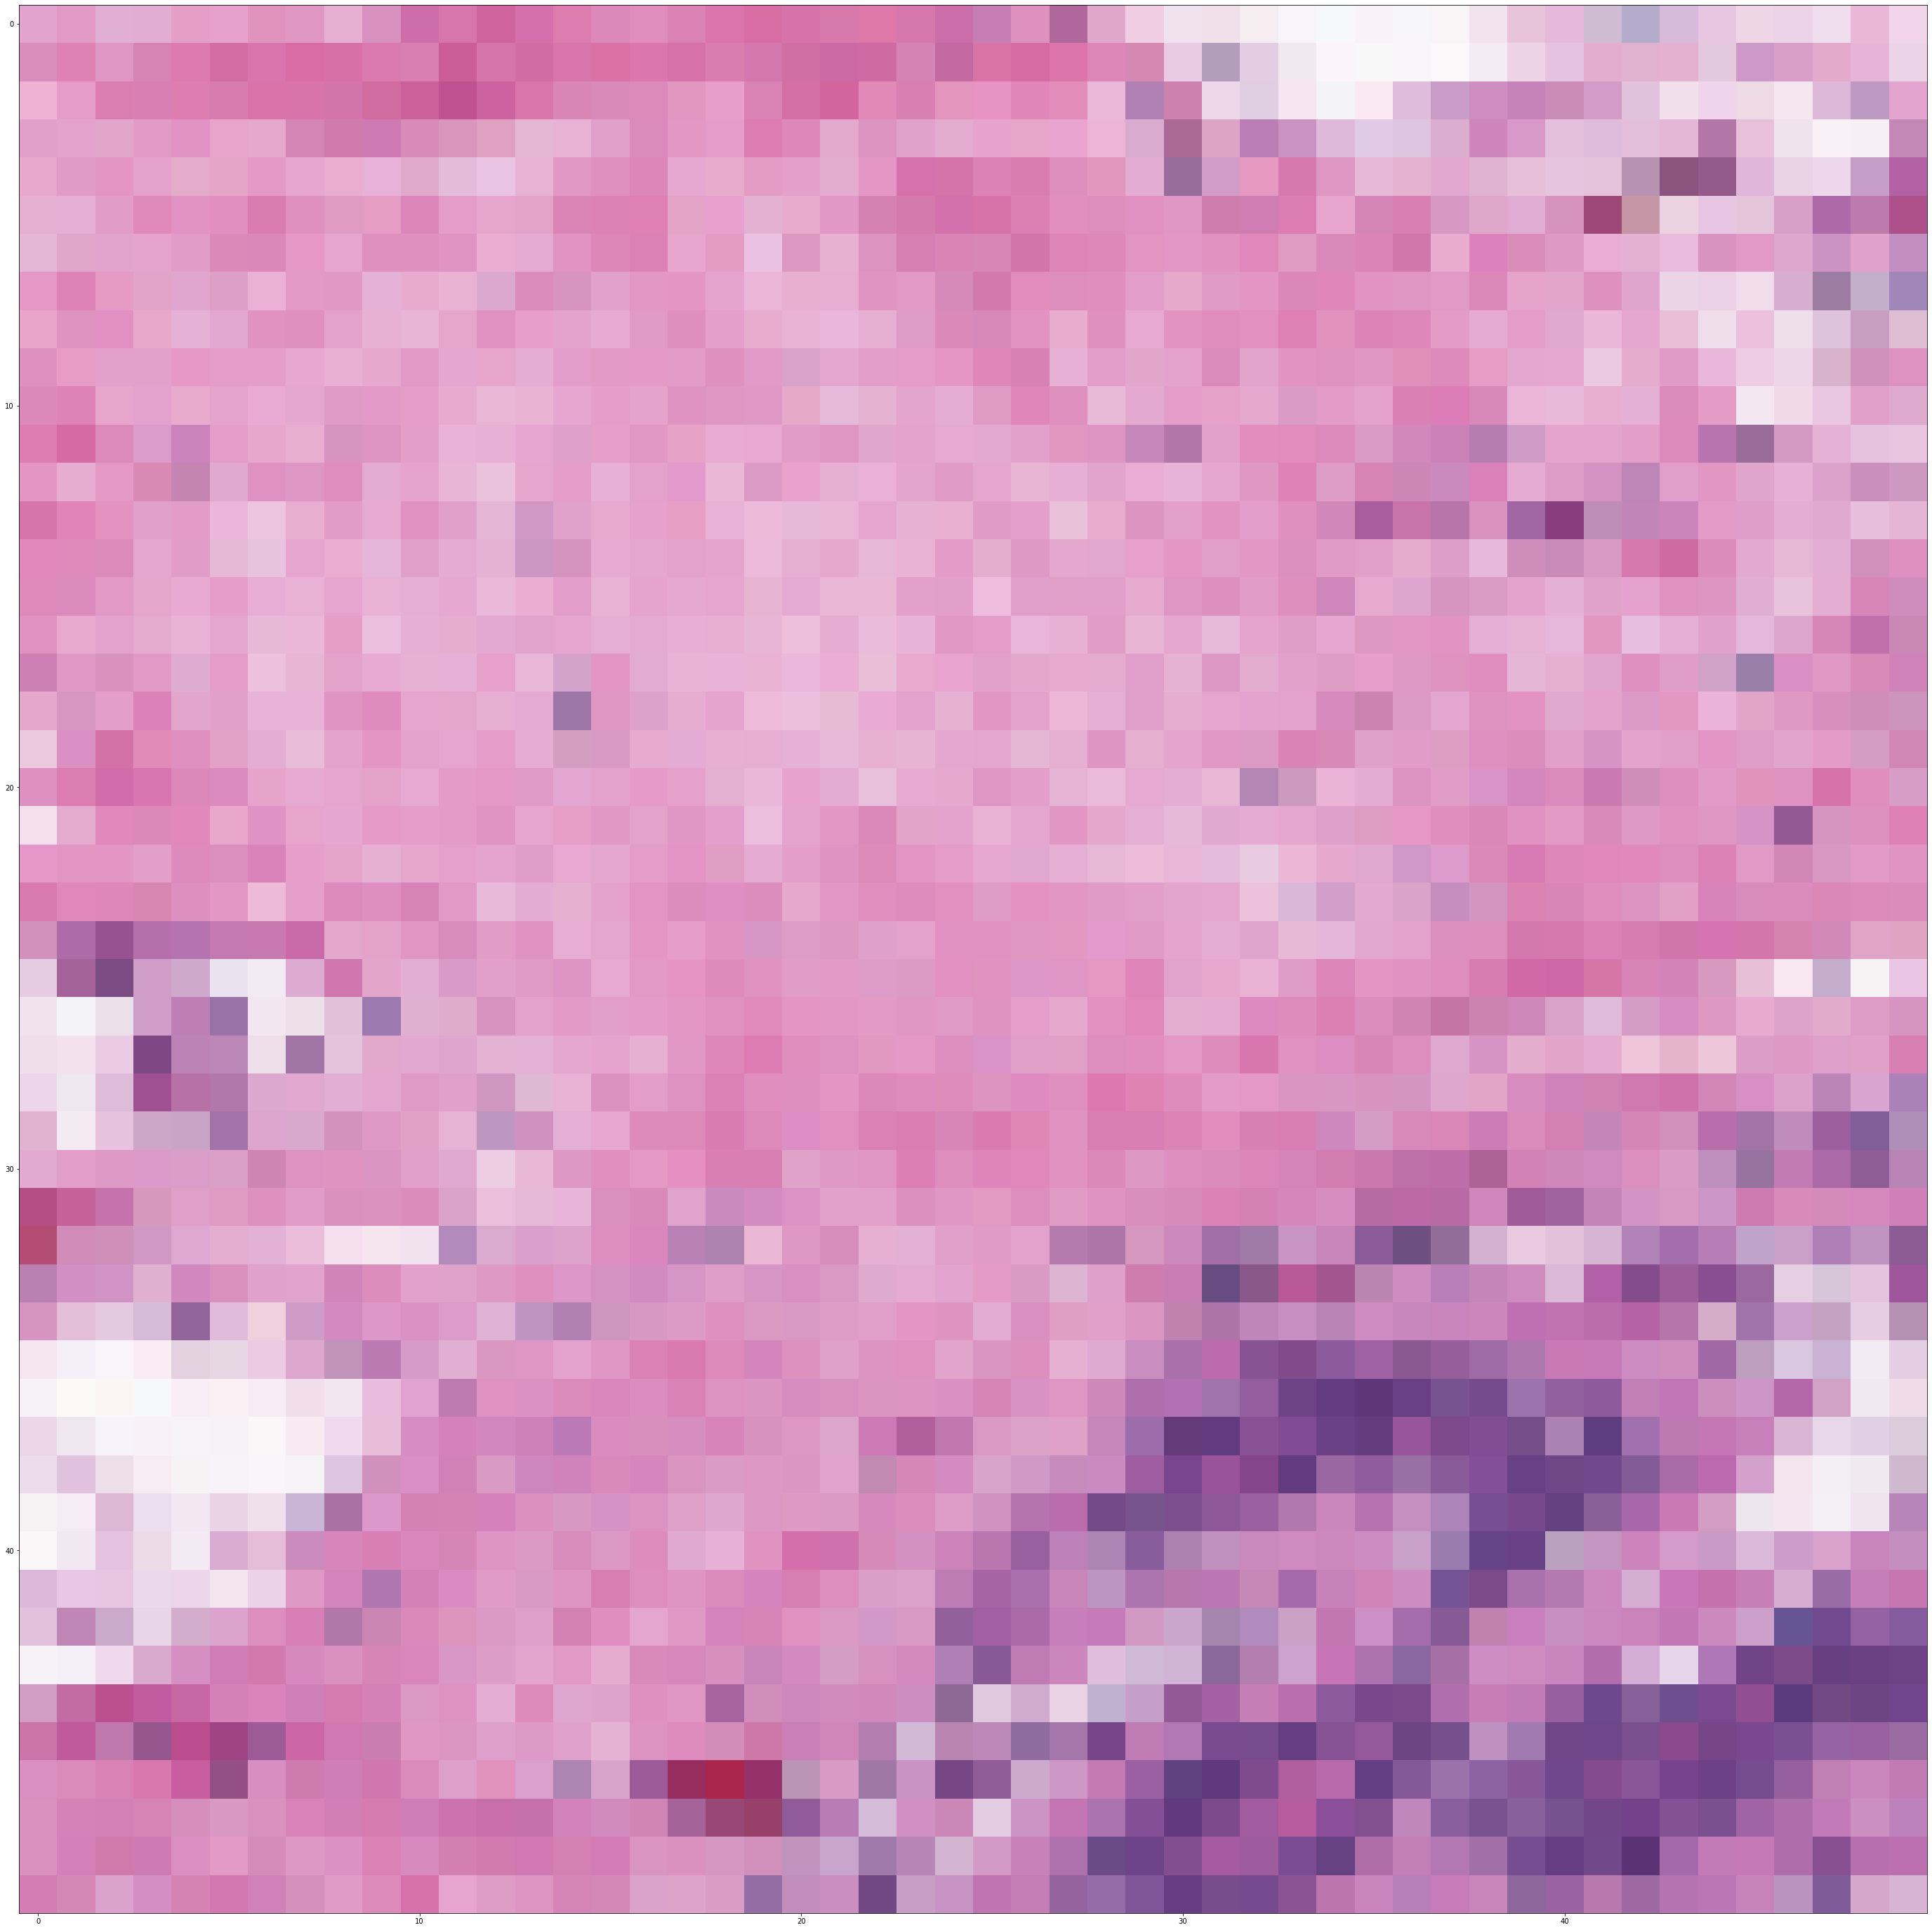

In [18]:
#USE OPENCV TO OPEN FIRST IMAGE --> FIRST READ AND AFTER DISPLAY
image = cv2.imread(path_first_image[0], 1) #READ COLOR IMAGE
plt.figure(figsize=(50,50))
plt.imshow(cv2.cvtColor(image,cv2.COLOR_BGR2RGB))
plt.show()


In [19]:
#SHOW 9 IMAGES
random.shuffle(images) #SHUFFLE ORDER OF IMAGES

def plotSamples(images, keyword):
    counter = 0
    plt.rcParams['figure.figsize'] = (10.0, 10.0)
    for file_index, filename in enumerate(images):
        if counter == 9:
            break
        if keyword in filename:
            image = cv2.imread(filename, 1) #COLOR IMAGE
            image = cv2.resize(image, (25,25))
            plt.subplot(3,3, counter+1)
            plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            plt.axis('off')
            counter = counter + 1


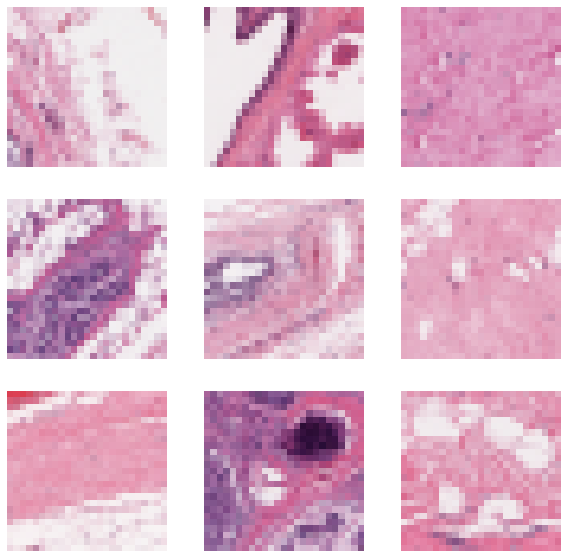

In [20]:
#HEATHY SAMPLES
plotSamples(images, health_keyword)
plt.show()


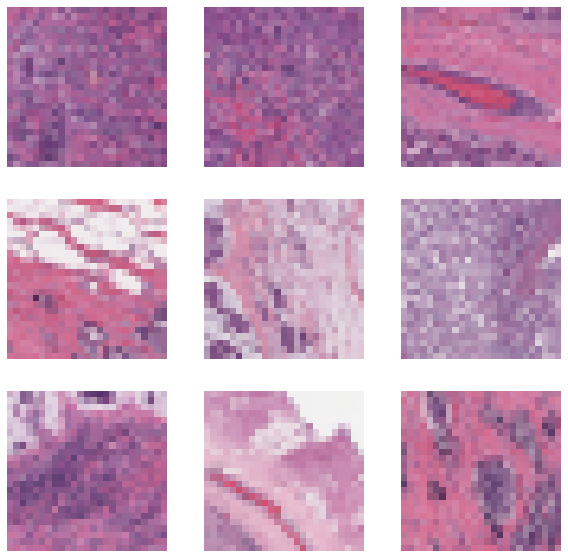

In [21]:
#DISEASE SAMPLES
plotSamples(images, disease_keyword)
plt.show()


In [22]:
#it's important to understand if images are complex or not
#so i display a bar plot that describes the % of Invasive Ductal Carcinoma in images
data = data.astype({"id": int, "image_path": str, "target": int})
total_patches_by_patient = data.groupby("id")["target"].count()
print(total_patches_by_patient)
patches_idc_by_patient = data[data["target"] == 1].groupby("id")["target"].count()
print(patches_idc_by_patient)


id
8863      979
8864     1133
8865      712
8867     1642
8913      955
         ... 
16568     828
16569     337
16570     917
16895     151
16896    1127
Name: target, Length: 279, dtype: int64
id
8863     207
8864     328
8865      55
8867     162
8913      82
        ... 
16568    283
16569     35
16570    542
16895     36
16896    110
Name: target, Length: 279, dtype: int64


id
8863     0.211440
8864     0.289497
8865     0.077247
8867     0.098660
8913     0.085864
           ...   
16568    0.341787
16569    0.103858
16570    0.591058
16895    0.238411
16896    0.097604
Name: target, Length: 279, dtype: float64


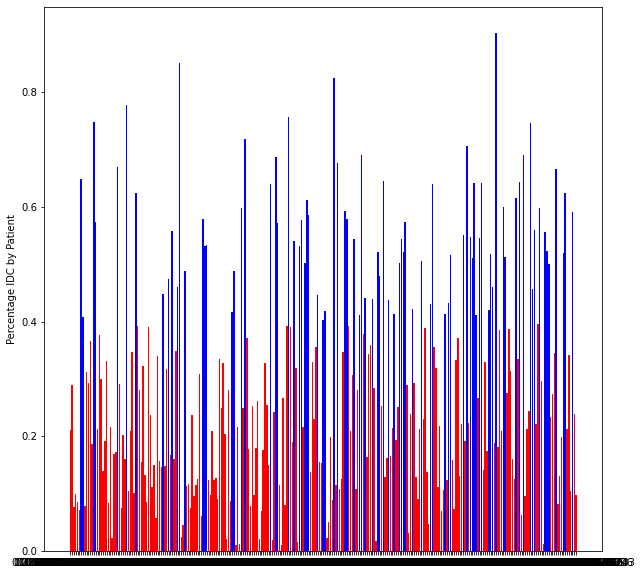

In [23]:
#plot this relationship
percentage_by_patient = patches_idc_by_patient/total_patches_by_patient
print(percentage_by_patient)
colors = ['blue' if i > 0.4 else 'red' for i in percentage_by_patient]

y_pos = np.arange(len(numberPatients))
plt.bar(y_pos, percentage_by_patient, align='center', color=colors)

plt.xticks(y_pos, percentage_by_patient)
plt.ylabel('Percentage IDC by Patient')
plt.show()


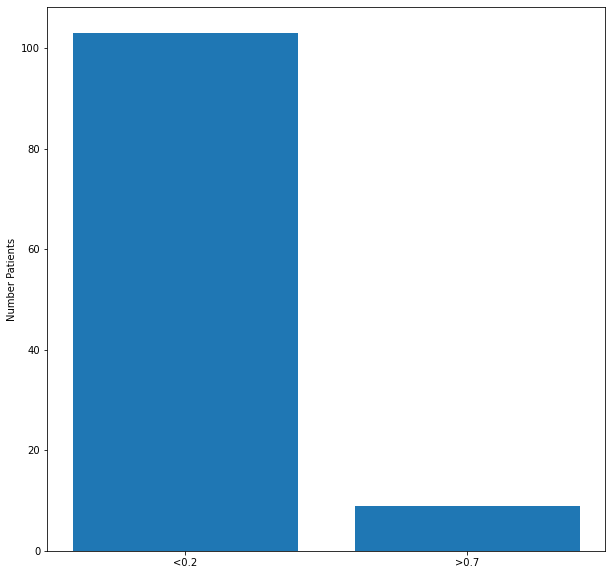

In [27]:
low = percentage_by_patient[percentage_by_patient < 0.2]
high = percentage_by_patient[percentage_by_patient > 0.7]
y_pos = ["<0.2", ">0.7"]
samples_total = [len(low), len(high)]
plt.bar(y_pos, samples_total, align='center')
plt.ylabel('Number Patients')
plt.show()